## Lab 4

### Zad1

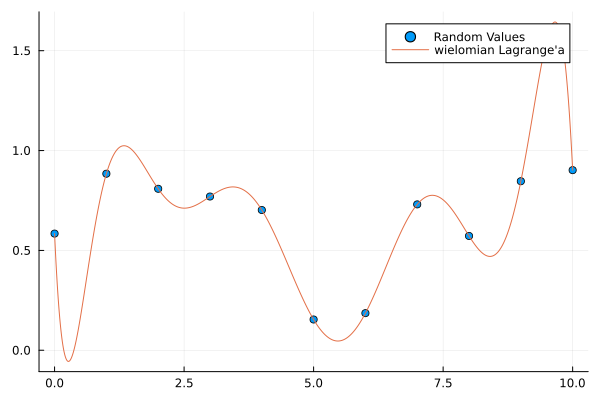

In [81]:
using Plots, Interpolations, Polynomials

function Lagrange_interpolation(xs, ys, x)
    n = size(xs)[1]
    result = 0
    for i in 1:n
        L = 1
        for j in 1:n
            if j != i
                L *= (x - xs[j]) / (xs[i] - xs[j])
            end
        end
        result += ys[i] * L
    end
    return result
end


xs = 0:1:10
ys = [rand() for _ in xs]
xsf = 0:0.01:10
interpol = [Lagrange_interpolation(xs, ys, x) for x in xsf]

scatter(xs, ys, label="Random Values")
plot!(xsf, interpol, label="wielomian Lagrange'a", legend=:topright)


### zad2

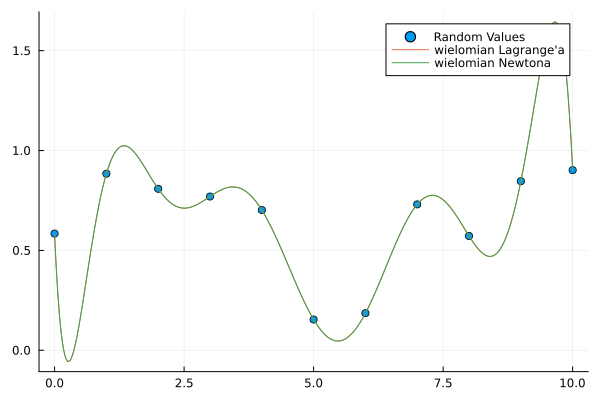

In [82]:
function NewtonInterpolation(xs, ys)
    T = Float64[]
    n = size(xs)[1]
    
    # Populate the divided difference table
    for a in 1:n
        push!(T, ys[a])
        for i in 1:a-1
            nom = T[end] - T[end - a + 1] # numerator of the divided difference
            den = xs[a] - xs[a - i]      # denominator of the divided difference
            push!(T, nom / den)          # push the divided difference onto T
        end
    end
    
    # Extract the coefficients of the interpolating polynomial
    newt = Float64[]
    k = 0
    for i in 1:n
        k = k + i
        push!(newt, T[k])  # Store the coefficients
    end
    return newt
end

function Newton(newt, xs, x)
    n = size(xs)[1]    # Size of xs, not xsf
    b = newt[n]        # Start with the last coefficient
    for i in 1:n-1
        b = newt[n-i] + b * (x - xs[n-i])  # Update b using the recursive Newton formula
    end
    return b
end

table = NewtonInterpolation(xs,ys)
newton = [Newton(table,xs,x) for x in xsf]
plot!(xsf,newton,label="wielomian Newtona")

### zad3

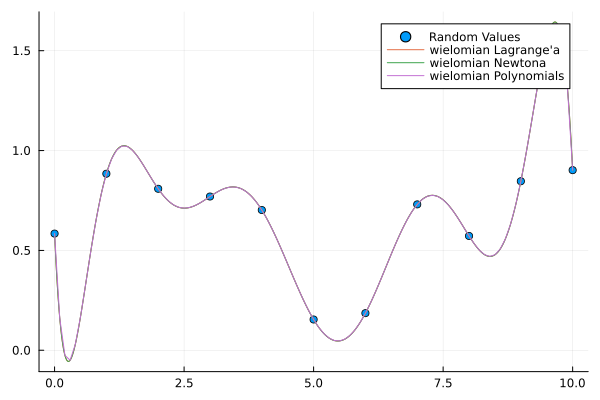

In [83]:
using Polynomials

f=fit(xs, ys)
plot!(f, extrema(xsf)...,label="wielomian Polynomials")

Wszystkie interpolacje właściwie się pokrywają (jedyne różnica można dostrzec na przegięciach funkcji). Wynika to z twierdzenia, które mówi, że istnieje tylko jeden wielomian n-tego stopnia przechodzący przez punkty.

### zad4

In [84]:
using DataFrames, CSV

sizes = 10:3:40
results = DataFrame(Size = Int[], Lagrange_interpolation = Float64[], Newton_polynomial = Float64[], Newton_Interpolation = Float64[], package_Polynomial = Float64[], package_interpolation = Float64[]) 

for i in sizes
    for j in 1:10
        section = 10 / i
        xs = 0:section:10
        ys = [rand() for _ in xs]
        xsf = 0:0.1:10

        lagr, time1 = @timed [Lagrange_interpolation(xs, ys, x) for x in xsf]
        newt, time2 = @timed NewtonInterpolation(xs, ys)
        newt2, time3 = @timed [Newton(newt, xs, x) for x in xsf]
        polyn, time4 = @timed fit(xs ,ys)
        polyn2, time5 = @timed [polyn(x) for x in xsf]

        push!(results, (i, time1, time2, time3, time4, time5)) 
    end
end

In [85]:
df = CSV.read("results.csv", DataFrame)

Row,Size,Lagrange_interpolation,Newton_polynomial,Newton_Interpolation,package_Polynomial,package_interpolation
,Int64,Float64,Float64,Float64,Float64,Float64
1,10,0.333106,0.0061618,0.0469526,0.0048402,0.0114429
2,10,0.484771,0.0026629,0.0246156,0.0042583,0.0110948
3,10,0.265753,0.0017413,0.0251654,0.0041519,0.0112422
4,10,0.268672,0.0017044,0.0227659,0.0041313,0.0114183
5,10,0.272678,0.0017016,0.0256129,0.0051522,0.0119301
6,10,0.272615,0.0018943,0.0255713,0.0042255,0.0126258
7,10,0.28693,0.0024691,0.0256457,0.0041345,0.0130901
8,10,0.282495,0.0017201,0.0256563,0.0057775,0.0118784
9,10,0.292098,0.0017297,0.0262366,0.0048476,0.0117658


In [86]:
using Statistics  

res = combine(groupby(df, :Size),
    :Lagrange_interpolation => mean => :m1,:Lagrange_interpolation => std => :s1,
    :Newton_polynomial => mean => :m2, :Newton_polynomial => std => :s2,
    :Newton_Interpolation => mean => :m3, :Newton_Interpolation => std => :s3,
    :package_Polynomial => mean => :m4, :package_Polynomial => std => :s4,
    :package_interpolation => mean => :m5, :package_interpolation => std => :s5)

Row,Size,m1,s1,m2,s2,m3,s3,m4,s4,m5,s5
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.302361,0.0671912,0.00234872,0.00138479,0.0272364,0.00699905,0.00457885,0.000558705,0.0117603,0.000658762
2,13,0.455462,0.00861117,0.00336547,0.000598749,0.0320427,0.000842813,0.00676185,0.000351524,0.0141385,0.000574947
3,16,0.655869,0.0142659,0.00427,0.00048484,0.0389683,0.0019838,0.00956529,0.000545438,0.0162975,0.00105151
4,19,0.903524,0.0299508,0.00652719,0.00160403,0.0446482,0.00204853,0.0128993,0.0010358,0.01845,0.00154234
5,22,1.19483,0.0134586,0.00788158,0.000439829,0.0519385,0.00197969,0.0170346,0.00145417,0.019394,0.000713301
6,25,1.50897,0.0207801,0.0103984,0.000652101,0.0581619,0.0022752,0.0211634,0.00107183,0.0218691,0.00153619
7,28,1.87306,0.0188173,0.0122861,0.000770983,0.0631647,0.00312781,0.0256573,0.00122986,0.0225076,0.000956071
8,31,2.28014,0.0241512,0.0151306,0.000632504,0.0708181,0.00267986,0.0328747,0.00313958,0.0256554,0.00129846
9,34,2.6957,0.0451169,0.0181541,0.000927868,0.0768357,0.00426236,0.0389951,0.00299206,0.026625,0.00109149


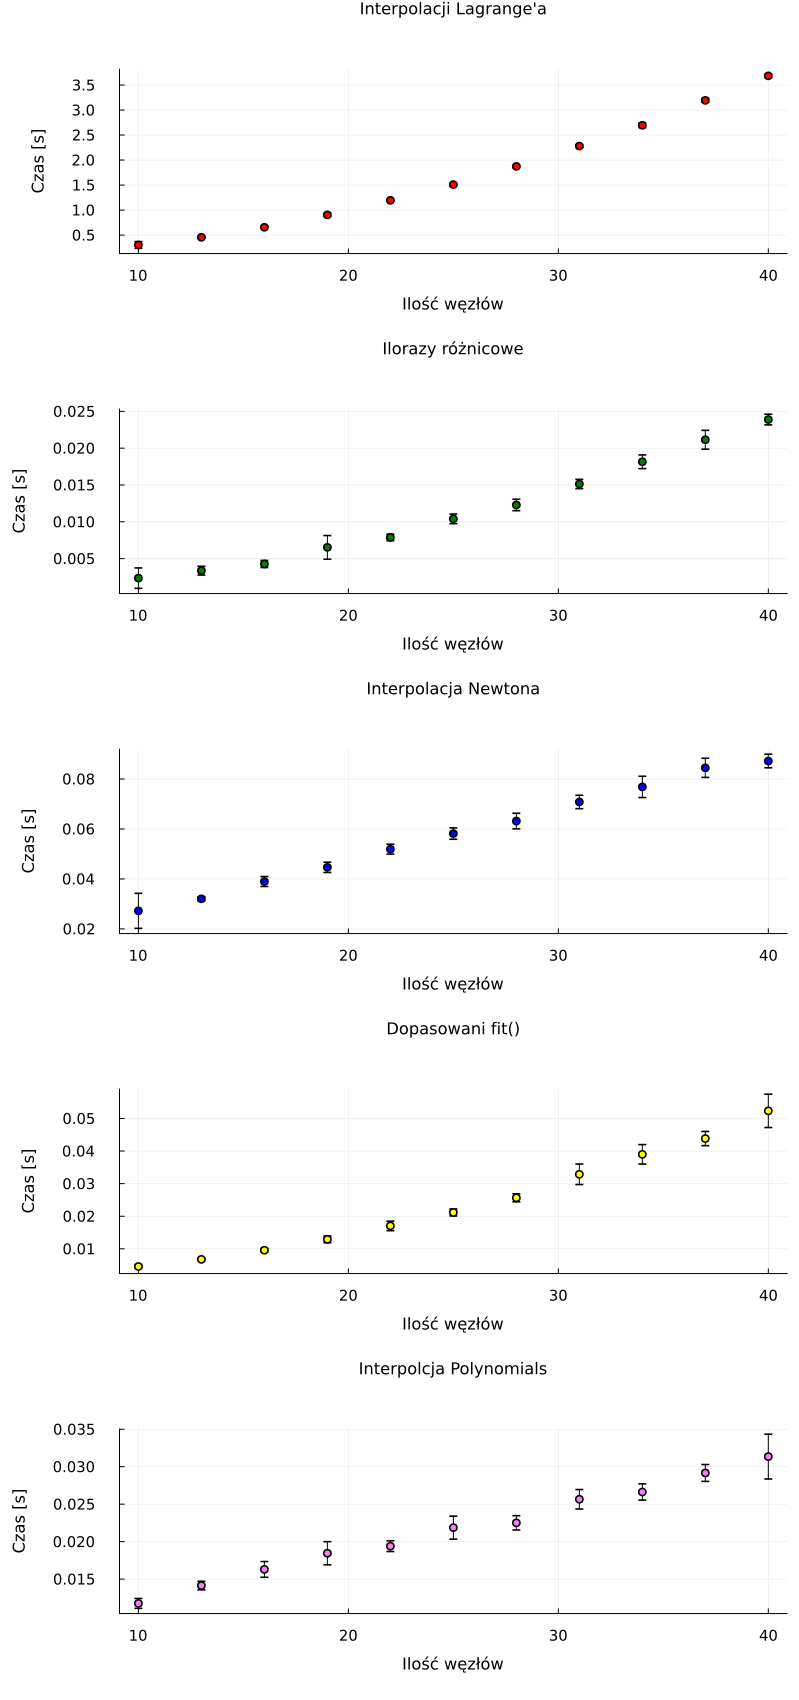

In [87]:
using Plots.PlotMeasures

scatter(
    res.Size,
    [res.m1,res.m2,res.m3,res.m4,res.m5], 
    color = [:red :green :blue :yellow :violet],
    yerr = [res.s1 res.s2 res.s3 res.s4 res.s5], 
    layout = grid(5,1),
    size = (800, 1700),
    left_margin = 15mm,
    top_margin = 10mm,
    bottom_margin = 5mm,
    xlabel = "Ilość węzłów",
    ylabel = "Czas [s]",
    xtickfont = font(10),
    ytickfont = font(10),
    titlefont = font(11),
    legend = false,
    title = ["Interpolacji Lagrange'a" "Ilorazy różnicowe" "Interpolacja Newtona" "Dopasowani fit()" "Interpolcja Polynomials"]
)


### zad5

In [88]:
function Neville(xs, ys, x)

    n = size(xs)[1]
    tab = zeros(Float64,n,n)

    for i in 1:n
        tab[i,1] = ys[i]
    end

    for i in 2:n
        for j in i:n
            tab[j,i] = ((x-xs[j])*tab[j-1,i-1] - (x-xs[j-i+1])*tab[j,i-1])/(xs[j-i+1]-xs[j])
        end
    end
    
    return tab[n,n]
end

Neville (generic function with 1 method)

In [89]:
values = [2.6,8.77,3.1,5.11,9.89,0.78,2.43]

println("Neville\t\t   Lagrange\t\t     różnica")
for val in values
    print(Neville(xs,ys,val),"  ",Lagrange_interpolation(xs,ys,val),"  ",abs(Neville(xs,ys,val)-Lagrange_interpolation(xs,ys,val)),"\n")
end

Neville		   Lagrange		     różnica
1.8874622767744342  1.8874622767744342  0.0
857.1684052871384  857.1684052871383  1.1368683772161603e-13
1.2333957031263634  1.2333957031263638  4.440892098500626e-16
0.3299228947854328  0.32992289478543274  5.551115123125783e-17
2.3502991642348766e8  2.3502991642348757e8  8.940696716308594e-8
-34455.15837535367  -34455.15837535369  2.1827872842550278e-11
-2.294387350146963  -2.2943873501469643  1.3322676295501878e-15


Algorytm Neville'a opiera się na interpolacji Lagrange'a, ale jest bardziej efektywny obliczeniowo. Zamiast obliczać całego wielomianu interpolacyjnego, algorytm Neville'a oblicza tylko wartości pośrednie wielomianu w celu znalezienia wartości interpolowanej w danym punkcie.

### zad6

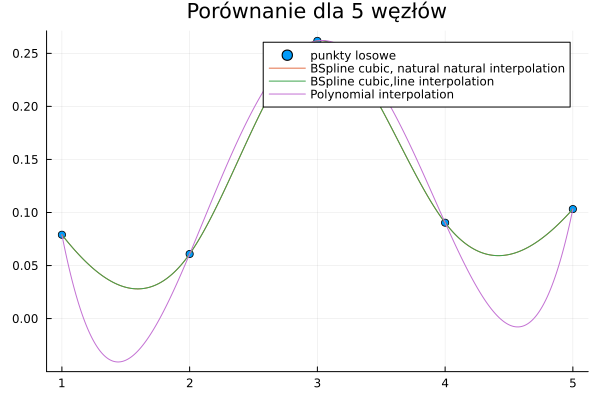

In [90]:
xs = 1:5
ys = [rand() for x in xs]
xsf = 1:0.01:5
scatter(xs,ys,label="punkty losowe")

bspline_cube = interpolate(ys, BSpline(Cubic(Natural(OnCell())))) # funcja kubiczba, natural - wygadzona 
ysf1=[bspline_cube(x) for x in xsf]
plot!(xsf,ysf1, label="BSpline cubic, natural natural interpolation")

bspline_line = interpolate(ys, BSpline(Cubic(Line(OnCell())))) # line - segmenty są liniowe
ysf2=[bspline_line(x) for x in xsf]
plot!(xsf,ysf2, label="BSpline cubic,line interpolation")

f5 = fit(xs,ys)
ysf3=[f5(x) for x in xsf]
plot!(xsf,ysf3, label="Polynomial interpolation", title="Porównanie dla 5 węzłów")

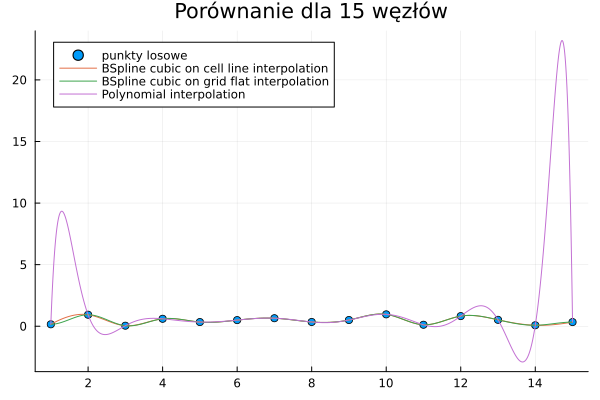

In [91]:
xs2 = 1:15
ys2 = [rand() for x in xs2]
xsf2 = 1:0.01:15

scatter(xs2,ys2,label="punkty losowe")
bspline_line = interpolate(ys2, BSpline(Cubic(Line(OnCell()))))
ysf4=[bspline_line(x) for x in xsf2]
plot!(xsf2,ysf4, label="BSpline cubic on cell line interpolation")

bspline_flat = interpolate(ys2, BSpline(Cubic(Flat(OnGrid()))))
ysf5=[bspline_flat(x) for x in xsf2]
plot!(xsf2,ysf5, label="BSpline cubic on grid flat interpolation")

f15 = fit(xs2,ys2)
ysf6=[f15(x) for x in xsf2]
plot!(xsf2,ysf6, label="Polynomial interpolation", title="Porównanie dla 15 węzłów")

Zauważenie, że wykresy nie pokrywają się, szczególnie na krańcach, jest zjawiskiem znanym jako efekt Rungego. Wynika on z interpolacji wielomianowej na równoodległych węzłach, prowadząc do nadmiernego "skakania" wielomianu interpolacyjnego między węzłami, co obniża dokładność interpolacji na krańcach przedziału. Aby złagodzić efekt Rungego, zaleca się zastosowanie innych metod interpolacji, takich jak funkcje sklejane, lub zmianę rozmieszczenia węzłów interpolacyjnych. Można także rozważyć zastosowanie mniejszego stopnia wielomianu interpolacyjnego.

Żeby uniknąć efektu Rungego można stosować interpolacje funkcjami sklejanymi lub przez równomierne rozłożenie węzłow.